In [198]:
# import spotipy
# from spotipy.oauth2 import SpotifyClientCredentials
# from random import randint
# from time import sleep
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets
from matplotlib.lines import Line2D
from sklearn.metrics import silhouette_score
pd.set_option("display.max_rows", 200, "display.max_columns", 200)

In [199]:
# https://www.kaggle.com/datasets/tomigelo/spotify-audio-features?resource=download
kaggle_2018 = pd.read_csv('SpotifyAudioFeaturesNov2018.csv')
kaggle_2019 = pd.read_csv('SpotifyAudioFeaturesApril2019.csv')
kaggle = pd.concat([kaggle_2018,kaggle_2019]).reset_index(drop=True)
print(kaggle.shape)
print(kaggle.columns)
kaggle

(247035, 17)
Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')


artist_name                track_id  \
0                          YG  2RM4jf1Xa9zPgMGRDiht8O   
1                          YG  1tHDG53xJNGsItRA3vfVgs   
2                       R3HAB  6Wosx2euFPMT14UXiWudMy   
3                  Chris Cooq  3J2Jpw61sO7l6Hc7qdYV91   
4                  Chris Cooq  2jbYvQCyPgX3CdmAzeVeuS   
...                       ...                     ...   
247030            Calum Scott  0cvfSKcm9VeduwyYPrxtLx   
247031           Saint Claire  43MP9F7UzvfilSrw2SqZGJ   
247032              Mike Stud  4TWlUuFk81NGUNKwndyS5Q   
247033               D Savage  5iGBXzOoRo4sBTy8wdzMyK   
247034  Banda Los Sebastianes  7LNtyuekYHiZ99UxkrfCQR   

                                            track_name  acousticness  \
0       Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj      0.005820   
1                         BAND DRUM (feat. A$AP Rocky)      0.024400   
2                                        Radio Silence      0.025000   
3                                              Lactose      0.029400   
4                                  Same - Original mix      0.000035   
...                                                ...           ...   
247030                                  Come Back Home      0.006780   
247031                                  Enough for You      0.918000   
247032                                           Do It      0.330000   
247033                                        No Smoke      0.007900   
247034                                         En Vida      0.549000   

        danceability  duration_ms  energy  instrumentalness  key  liveness  \
0              0.743       238373   0.339             0.000    1    0.0812   
1              0.846       214800   0.557             0.000    8    0.2860   
2              0.603       138913   0.723             0.000    9    0.0824   
3              0.800       125381   0.579             0.912    5    0.0994   
4              0.783       124016   0.792             0.878    7    0.0332   
...              ...          ...     ...               ...  ...       ...   
247030         0.601       190539   0.801             0.000   11    0.0991   
247031         0.387       194583   0.249             0.000    9    0.1030   
247032         0.717       139191   0.532             0.000    8    0.0997   
247033         0.772       180013   0.510             0.000    4    0.1310   
247034         0.715       145827   0.734             0.000    3    0.1080   

        loudness  mode  speechiness    tempo  time_signature  valence  \
0         -7.678     1       0.4090  203.927               4   0.1180   
1         -7.259     1       0.4570  159.009               4   0.3710   
2         -5.890     0       0.0454  114.966               4   0.3820   
3        -12.118     0       0.0701  123.003               4   0.6410   
4        -10.277     1       0.0661  120.047               4   0.9280   
...          ...   ...          ...      ...             ...      ...   
247030    -5.174     1       0.0323  131.049               4   0.2890   
247031   -13.233     1       0.0437   94.039               4   0.3460   
247032    -8.351     0       0.2060  156.977               4   0.5460   
247033    -9.670     0       0.1200  120.049               4   0.0755   
247034    -3.244     1       0.0367  130.128               3   0.9760   

        popularity  
0               44  
1               10  
2               63  
3                9  
4                8  
...            ...  
247030          57  
247031          60  
247032          47  
247033          50  
247034          55  

[247035 rows x 17 columns]

### Checking for duplicates then dropping them

In [200]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
# kaggle['dup_last'] = kaggle.duplicated(keep='last')
kaggle['dup_first'] = kaggle.duplicated(keep='first')
kaggle
# index row 5295 is duplicated

artist_name                track_id  \
0                          YG  2RM4jf1Xa9zPgMGRDiht8O   
1                          YG  1tHDG53xJNGsItRA3vfVgs   
2                       R3HAB  6Wosx2euFPMT14UXiWudMy   
3                  Chris Cooq  3J2Jpw61sO7l6Hc7qdYV91   
4                  Chris Cooq  2jbYvQCyPgX3CdmAzeVeuS   
...                       ...                     ...   
247030            Calum Scott  0cvfSKcm9VeduwyYPrxtLx   
247031           Saint Claire  43MP9F7UzvfilSrw2SqZGJ   
247032              Mike Stud  4TWlUuFk81NGUNKwndyS5Q   
247033               D Savage  5iGBXzOoRo4sBTy8wdzMyK   
247034  Banda Los Sebastianes  7LNtyuekYHiZ99UxkrfCQR   

                                            track_name  acousticness  \
0       Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj      0.005820   
1                         BAND DRUM (feat. A$AP Rocky)      0.024400   
2                                        Radio Silence      0.025000   
3                                              Lactose      0.029400   
4                                  Same - Original mix      0.000035   
...                                                ...           ...   
247030                                  Come Back Home      0.006780   
247031                                  Enough for You      0.918000   
247032                                           Do It      0.330000   
247033                                        No Smoke      0.007900   
247034                                         En Vida      0.549000   

        danceability  duration_ms  energy  instrumentalness  key  liveness  \
0              0.743       238373   0.339             0.000    1    0.0812   
1              0.846       214800   0.557             0.000    8    0.2860   
2              0.603       138913   0.723             0.000    9    0.0824   
3              0.800       125381   0.579             0.912    5    0.0994   
4              0.783       124016   0.792             0.878    7    0.0332   
...              ...          ...     ...               ...  ...       ...   
247030         0.601       190539   0.801             0.000   11    0.0991   
247031         0.387       194583   0.249             0.000    9    0.1030   
247032         0.717       139191   0.532             0.000    8    0.0997   
247033         0.772       180013   0.510             0.000    4    0.1310   
247034         0.715       145827   0.734             0.000    3    0.1080   

        loudness  mode  speechiness    tempo  time_signature  valence  \
0         -7.678     1       0.4090  203.927               4   0.1180   
1         -7.259     1       0.4570  159.009               4   0.3710   
2         -5.890     0       0.0454  114.966               4   0.3820   
3        -12.118     0       0.0701  123.003               4   0.6410   
4        -10.277     1       0.0661  120.047               4   0.9280   
...          ...   ...          ...      ...             ...      ...   
247030    -5.174     1       0.0323  131.049               4   0.2890   
247031   -13.233     1       0.0437   94.039               4   0.3460   
247032    -8.351     0       0.2060  156.977               4   0.5460   
247033    -9.670     0       0.1200  120.049               4   0.0755   
247034    -3.244     1       0.0367  130.128               3   0.9760   

        popularity  dup_first  
0               44      False  
1               10      False  
2               63      False  
3                9      False  
4                8      False  
...            ...        ...  
247030          57       True  
247031          60      False  
247032          47      False  
247033          50      False  
247034          55      False  

[247035 rows x 18 columns]

In [201]:
kaggle.loc[kaggle['dup_first'] == True]

artist_name                track_id  \
116421        Your Smith  5Y7DSov75Ic5viePFoD0WX   
116422       Snow Patrol  0aYzQjr1hq0qJwp45diy5M   
116423  Dirty Projectors  7B1he5MaIXjreL2R4qOa6h   
116430               UNB  4SiGRgJVUUDpMbW6LxJRCH   
116435         Southside  7H4KuOHwoKEgPla1yHhq1N   
...                  ...                     ...   
246951         YFN Lucci  6Zk8sjWMAHmDt5cjGsyvps   
247003          Dua Lipa  2lOuvydCaSk8asn1HxBO9r   
247006              Joji  1n8KCrv2wq43ysd6HQCpV6   
247027            Atreyu  1RAT7pGtFKGsVe38SDKvKo   
247030       Calum Scott  0cvfSKcm9VeduwyYPrxtLx   

                            track_name  acousticness  danceability  \
116421                        The Spot       0.06170         0.935   
116422                         Heal Me       0.12200         0.552   
116423                       Blue Bird       0.52000         0.530   
116430                     BLACK HEART       0.01980         0.713   
116435                     Some Nights       0.09780         0.404   
...                                ...           ...           ...   
246951                        Go Crazy       0.16800         0.721   
247003                      Be The One       0.11700         0.661   
247006  Will He (Ryan Hemsworth Remix)       0.82800         0.533   
247027               Anger Left Behind       0.05670         0.416   
247030                  Come Back Home       0.00678         0.601   

        duration_ms  energy  instrumentalness  key  liveness  loudness  mode  \
116421       171383   0.756          0.000008    4    0.1200    -6.957     1   
116422       241160   0.789          0.000005    9    0.0874    -5.449     1   
116423       229333   0.521          0.028900    8    0.2090    -7.939     0   
116430       185969   0.937          0.000000    5    0.5700    -2.107     1   
116435       198553   0.926          0.000000    4    0.1020    -4.986     0   
...             ...     ...               ...  ...       ...       ...   ...   
246951       140280   0.760          0.000000   11    0.1020    -7.207     0   
247003       202915   0.651          0.000013    7    0.0560    -3.771     0   
247006       168189   0.384          0.008490    2    0.1180   -10.371     0   
247027       203547   0.987          0.000145    0    0.0853    -3.333     1   
247030       190539   0.801          0.000000   11    0.0991    -5.174     1   

        speechiness    tempo  time_signature  valence  popularity  dup_first  
116421       0.0840  112.045               4    0.961          48       True  
116422       0.0242   93.938               4    0.349          53       True  
116423       0.1520  117.259               3    0.529          37       True  
116430       0.1310  125.969               4    0.728          47       True  
116435       0.7340   85.960               4    0.211          30       True  
...             ...      ...             ...      ...         ...        ...  
246951       0.2780  137.130               4    0.354          47       True  
247003       0.0499   87.460               4    0.368          60       True  
247006       0.0394  126.570               4    0.327          52       True  
247027       0.2100  155.045               4    0.258          54       True  
247030       0.0323  131.049               4    0.289          57       True  

[24891 rows x 18 columns]

In [202]:
kaggle.loc[kaggle.track_id == '5Y7DSov75Ic5viePFoD0WX']

artist_name                track_id track_name  acousticness  \
49      Your Smith  5Y7DSov75Ic5viePFoD0WX   The Spot        0.0617   
116421  Your Smith  5Y7DSov75Ic5viePFoD0WX   The Spot        0.0617   

        danceability  duration_ms  energy  instrumentalness  key  liveness  \
49             0.935       171383   0.756          0.000008    4      0.12   
116421         0.935       171383   0.756          0.000008    4      0.12   

        loudness  mode  speechiness    tempo  time_signature  valence  \
49        -6.957     1        0.084  112.045               4    0.961   
116421    -6.957     1        0.084  112.045               4    0.961   

        popularity  dup_first  
49              48      False  
116421          48       True

In [203]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
kaggle.drop(kaggle[kaggle['dup_first'] == True].index, inplace = True)
kaggle = kaggle.reset_index(drop=True)
print(kaggle.shape)
kaggle.loc[kaggle['dup_first'] == True]

(222144, 18)


Empty DataFrame
Columns: [artist_name, track_id, track_name, acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence, popularity, dup_first]
Index: []

In [204]:
kaggle = kaggle.drop(['dup_first'], axis = 1)
print(kaggle.columns)
kaggle

Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')


artist_name                track_id  \
0                          YG  2RM4jf1Xa9zPgMGRDiht8O   
1                          YG  1tHDG53xJNGsItRA3vfVgs   
2                       R3HAB  6Wosx2euFPMT14UXiWudMy   
3                  Chris Cooq  3J2Jpw61sO7l6Hc7qdYV91   
4                  Chris Cooq  2jbYvQCyPgX3CdmAzeVeuS   
...                       ...                     ...   
222139             City Girls  7224Tp60srKUp78CkPfAo9   
222140           Saint Claire  43MP9F7UzvfilSrw2SqZGJ   
222141              Mike Stud  4TWlUuFk81NGUNKwndyS5Q   
222142               D Savage  5iGBXzOoRo4sBTy8wdzMyK   
222143  Banda Los Sebastianes  7LNtyuekYHiZ99UxkrfCQR   

                                            track_name  acousticness  \
0       Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj      0.005820   
1                         BAND DRUM (feat. A$AP Rocky)      0.024400   
2                                        Radio Silence      0.025000   
3                                              Lactose      0.029400   
4                                  Same - Original mix      0.000035   
...                                                ...           ...   
222139                                            Drip      0.181000   
222140                                  Enough for You      0.918000   
222141                                           Do It      0.330000   
222142                                        No Smoke      0.007900   
222143                                         En Vida      0.549000   

        danceability  duration_ms  energy  instrumentalness  key  liveness  \
0              0.743       238373   0.339             0.000    1    0.0812   
1              0.846       214800   0.557             0.000    8    0.2860   
2              0.603       138913   0.723             0.000    9    0.0824   
3              0.800       125381   0.579             0.912    5    0.0994   
4              0.783       124016   0.792             0.878    7    0.0332   
...              ...          ...     ...               ...  ...       ...   
222139         0.880       152544   0.627             0.000   11    0.1020   
222140         0.387       194583   0.249             0.000    9    0.1030   
222141         0.717       139191   0.532             0.000    8    0.0997   
222142         0.772       180013   0.510             0.000    4    0.1310   
222143         0.715       145827   0.734             0.000    3    0.1080   

        loudness  mode  speechiness    tempo  time_signature  valence  \
0         -7.678     1       0.4090  203.927               4   0.1180   
1         -7.259     1       0.4570  159.009               4   0.3710   
2         -5.890     0       0.0454  114.966               4   0.3820   
3        -12.118     0       0.0701  123.003               4   0.6410   
4        -10.277     1       0.0661  120.047               4   0.9280   
...          ...   ...          ...      ...             ...      ...   
222139    -5.429     0       0.2670  151.995               4   0.3930   
222140   -13.233     1       0.0437   94.039               4   0.3460   
222141    -8.351     0       0.2060  156.977               4   0.5460   
222142    -9.670     0       0.1200  120.049               4   0.0755   
222143    -3.244     1       0.0367  130.128               3   0.9760   

        popularity  
0               44  
1               10  
2               63  
3                9  
4                8  
...            ...  
222139          48  
222140          60  
222141          47  
222142          50  
222143          55  

[222144 rows x 17 columns]

In [205]:
kaggle = kaggle.rename(columns={'artist_name':'artist','track_id':'id','track_name':'songs'})
kaggle.columns


Index(['artist', 'id', 'songs', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'popularity'],
      dtype='object')

In [206]:
kaggle = kaggle[['artist', 'songs', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'id', 'duration_ms', 'time_signature']]
kaggle.columns

Index(['artist', 'songs', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'id', 'duration_ms', 'time_signature'],
      dtype='object')

In [207]:
spoti_df = pd.read_csv('..\lab-api-wrappers\spotify_songs_and_features.csv')

In [208]:
print('spoti_df shape: ',spoti_df.shape)
print(spoti_df.columns)

spoti_df shape:  (5305, 21)
Index(['artist', 'songs', 'uri', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')


In [209]:
spoti_df = spoti_df.drop(['uri', 'track_href','analysis_url','type'], axis=1)
spoti_df.columns

Index(['artist', 'songs', 'popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'id', 'duration_ms', 'time_signature'],
      dtype='object')

### Bringing Kaggle and Spotify DFs together

In [210]:
full_df = pd.concat([spoti_df,kaggle]).reset_index(drop=True)
print(full_df.shape)
full_df

(227449, 17)


artist                       songs  popularity  \
0                    Bon Jovi          Livin' On A Prayer          81   
1                  Rose Royce           Wishing on a Star          53   
2                        Muse                   Supremacy          58   
3                   Whigfield  Saturday Night - Radio Mix          65   
4                      Eminem         The Real Slim Shady          85   
...                       ...                         ...         ...   
227444             City Girls                        Drip          48   
227445           Saint Claire              Enough for You          60   
227446              Mike Stud                       Do It          47   
227447               D Savage                    No Smoke          50   
227448  Banda Los Sebastianes                     En Vida          55   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.532   0.887    0    -3.757     1       0.0335       0.07780   
1              0.333   0.422    5   -15.171     0       0.0527       0.71600   
2              0.256   0.679    9    -4.495     0       0.0387       0.00451   
3              0.728   0.784   11   -11.776     1       0.0379       0.04490   
4              0.949   0.661    5    -4.244     0       0.0572       0.03020   
...              ...     ...  ...       ...   ...          ...           ...   
227444         0.880   0.627   11    -5.429     0       0.2670       0.18100   
227445         0.387   0.249    9   -13.233     1       0.0437       0.91800   
227446         0.717   0.532    8    -8.351     0       0.2060       0.33000   
227447         0.772   0.510    4    -9.670     0       0.1200       0.00790   
227448         0.715   0.734    3    -3.244     1       0.0367       0.54900   

        instrumentalness  liveness  valence    tempo                      id  \
0               0.000214    0.2940   0.7950  122.511  37ZJ0p5Jm13JPevGcx4SkF   
1               0.000041    0.0455   0.5530   97.305  0u2CGItUO2jYEiFaXD7n5S   
2               0.040900    0.1720   0.3250  158.718  40pPI2TbaYSZlKfV44HRjn   
3               0.091800    0.0964   0.9640  129.981  59VRFpPnC8pOhIH2WCWXF9   
4               0.000000    0.0454   0.7600  104.504  3yfqSUWxFvZELEM4PmlwIR   
...                  ...       ...      ...      ...                     ...   
227444          0.000000    0.1020   0.3930  151.995  7224Tp60srKUp78CkPfAo9   
227445          0.000000    0.1030   0.3460   94.039  43MP9F7UzvfilSrw2SqZGJ   
227446          0.000000    0.0997   0.5460  156.977  4TWlUuFk81NGUNKwndyS5Q   
227447          0.000000    0.1310   0.0755  120.049  5iGBXzOoRo4sBTy8wdzMyK   
227448          0.000000    0.1080   0.9760  130.128  7LNtyuekYHiZ99UxkrfCQR   

        duration_ms  time_signature  
0            249293               4  
1            291760               4  
2            295373               4  
3            247406               4  
4            284200               4  
...             ...             ...  
227444       152544               4  
227445       194583               4  
227446       139191               4  
227447       180013               4  
227448       145827               3  

[227449 rows x 17 columns]

### Checking for duplicates then dropping them

In [211]:
full_df['dup_first'] = full_df.duplicated(keep='first')
full_df.loc[full_df['dup_first'] == True]

artist                    songs  popularity  danceability  energy  \
292   Selena Gomez    Kill Em With Kindness          63         0.757   0.884   
414           P!nk              U + Ur Hand           0         0.709   0.891   
571        Rihanna                      SOS           0         0.677   0.671   
1351    Otto Knows               Next to Me          56         0.596   0.752   
1558         SANNI  Tahdon rakastella sinua          28         0.599   0.879   

      key  loudness  mode  speechiness  acousticness  instrumentalness  \
292    10    -5.488     0       0.0404       0.00795          0.000059   
414     0    -3.688     1       0.0528       0.00144          0.000000   
571     7    -4.905     1       0.0361       0.00400          0.000051   
1351   11    -4.904     1       0.0700       0.78500          0.000419   
1558    8    -3.309     1       0.0965       0.02220          0.000000   

      liveness  valence    tempo                      id  duration_ms  \
292     0.0973    0.398  120.012  7KxhSJOYiqCDclXDBNlFSZ       217907   
414     0.0340    0.886  141.040  7klL6qvAu4ZzthaUzLvtIN       214387   
571     0.4130    0.527  137.046  4S5b3wwIXpVNvY2jeIQdKu       238920   
1351    0.1050    0.306  127.060  6ZixfeFT8V0Nle1rMZAekY       202169   
1558    0.0725    0.538  147.055  6FwrG9yyKfGve1wOMq98f9       212527   

      time_signature  dup_first  
292                4       True  
414                4       True  
571                4       True  
1351               4       True  
1558               4       True

In [212]:
full_df.loc[full_df.id == '7KxhSJOYiqCDclXDBNlFSZ']

artist                  songs  popularity  danceability  energy  \
189  Selena Gomez  Kill Em With Kindness          63         0.757   0.884   
292  Selena Gomez  Kill Em With Kindness          63         0.757   0.884   

     key  loudness  mode  speechiness  acousticness  instrumentalness  \
189   10    -5.488     0       0.0404       0.00795          0.000059   
292   10    -5.488     0       0.0404       0.00795          0.000059   

     liveness  valence    tempo                      id  duration_ms  \
189    0.0973    0.398  120.012  7KxhSJOYiqCDclXDBNlFSZ       217907   
292    0.0973    0.398  120.012  7KxhSJOYiqCDclXDBNlFSZ       217907   

     time_signature  dup_first  
189               4      False  
292               4       True

In [213]:
full_df.drop(full_df[full_df['dup_first'] == True].index, inplace = True)
full_df = full_df.reset_index(drop=True)
print(full_df.shape)
full_df.loc[full_df['dup_first'] == True]

(227444, 18)


Empty DataFrame
Columns: [artist, songs, popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, id, duration_ms, time_signature, dup_first]
Index: []

In [214]:
full_df = full_df.drop(['dup_first'], axis = 1)
full_df

artist                       songs  popularity  \
0                    Bon Jovi          Livin' On A Prayer          81   
1                  Rose Royce           Wishing on a Star          53   
2                        Muse                   Supremacy          58   
3                   Whigfield  Saturday Night - Radio Mix          65   
4                      Eminem         The Real Slim Shady          85   
...                       ...                         ...         ...   
227439             City Girls                        Drip          48   
227440           Saint Claire              Enough for You          60   
227441              Mike Stud                       Do It          47   
227442               D Savage                    No Smoke          50   
227443  Banda Los Sebastianes                     En Vida          55   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.532   0.887    0    -3.757     1       0.0335       0.07780   
1              0.333   0.422    5   -15.171     0       0.0527       0.71600   
2              0.256   0.679    9    -4.495     0       0.0387       0.00451   
3              0.728   0.784   11   -11.776     1       0.0379       0.04490   
4              0.949   0.661    5    -4.244     0       0.0572       0.03020   
...              ...     ...  ...       ...   ...          ...           ...   
227439         0.880   0.627   11    -5.429     0       0.2670       0.18100   
227440         0.387   0.249    9   -13.233     1       0.0437       0.91800   
227441         0.717   0.532    8    -8.351     0       0.2060       0.33000   
227442         0.772   0.510    4    -9.670     0       0.1200       0.00790   
227443         0.715   0.734    3    -3.244     1       0.0367       0.54900   

        instrumentalness  liveness  valence    tempo                      id  \
0               0.000214    0.2940   0.7950  122.511  37ZJ0p5Jm13JPevGcx4SkF   
1               0.000041    0.0455   0.5530   97.305  0u2CGItUO2jYEiFaXD7n5S   
2               0.040900    0.1720   0.3250  158.718  40pPI2TbaYSZlKfV44HRjn   
3               0.091800    0.0964   0.9640  129.981  59VRFpPnC8pOhIH2WCWXF9   
4               0.000000    0.0454   0.7600  104.504  3yfqSUWxFvZELEM4PmlwIR   
...                  ...       ...      ...      ...                     ...   
227439          0.000000    0.1020   0.3930  151.995  7224Tp60srKUp78CkPfAo9   
227440          0.000000    0.1030   0.3460   94.039  43MP9F7UzvfilSrw2SqZGJ   
227441          0.000000    0.0997   0.5460  156.977  4TWlUuFk81NGUNKwndyS5Q   
227442          0.000000    0.1310   0.0755  120.049  5iGBXzOoRo4sBTy8wdzMyK   
227443          0.000000    0.1080   0.9760  130.128  7LNtyuekYHiZ99UxkrfCQR   

        duration_ms  time_signature  
0            249293               4  
1            291760               4  
2            295373               4  
3            247406               4  
4            284200               4  
...             ...             ...  
227439       152544               4  
227440       194583               4  
227441       139191               4  
227442       180013               4  
227443       145827               3  

[227444 rows x 17 columns]

### Splitting X and y to Scale and Kmean

In [215]:
full_df.dtypes

artist               object
songs                object
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
id                   object
duration_ms           int64
time_signature        int64
dtype: object

In [216]:
X = full_df[['popularity','danceability','energy','key','loudness','mode','speechiness',
                       'acousticness','instrumentalness','liveness','valence','tempo',
                       'duration_ms','time_signature']]
y = pd.Series(full_df['songs'])
X.head()

popularity  danceability  energy  key  loudness  mode  speechiness  \
0          81         0.532   0.887    0    -3.757     1       0.0335   
1          53         0.333   0.422    5   -15.171     0       0.0527   
2          58         0.256   0.679    9    -4.495     0       0.0387   
3          65         0.728   0.784   11   -11.776     1       0.0379   
4          85         0.949   0.661    5    -4.244     0       0.0572   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.07780          0.000214    0.2940    0.795  122.511       249293   
1       0.71600          0.000041    0.0455    0.553   97.305       291760   
2       0.00451          0.040900    0.1720    0.325  158.718       295373   
3       0.04490          0.091800    0.0964    0.964  129.981       247406   
4       0.03020          0.000000    0.0454    0.760  104.504       284200   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

In [217]:
y

0                 Livin' On A Prayer
1                  Wishing on a Star
2                          Supremacy
3         Saturday Night - Radio Mix
4                The Real Slim Shady
                     ...            
227439                          Drip
227440                Enough for You
227441                         Do It
227442                      No Smoke
227443                       En Vida
Name: songs, Length: 227444, dtype: object

In [218]:
X_prep = StandardScaler().fit_transform(X)

pd.DataFrame(X_prep,columns=X.columns).head()

popularity  danceability    energy       key  loudness      mode  \
0    2.915683     -0.269719  1.214043 -1.452062  0.935208  0.804541   
1    1.440701     -1.322749 -0.582540 -0.064051 -0.819546 -1.242945   
2    1.704090     -1.730203  0.410410  1.046358  0.821750 -1.242945   
3    2.072836      0.767437  0.816090  1.601562 -0.297609  0.804541   
4    3.126394      1.936883  0.340865 -0.064051  0.860338 -1.242945   

   speechiness  acousticness  instrumentalness  liveness   valence     tempo  \
0    -0.631843     -0.753297         -0.609334  0.597683  1.371468  0.098774   
1    -0.476405      1.104766         -0.609818 -0.891792  0.434289 -0.738949   
2    -0.589745     -0.966675         -0.495251 -0.133568 -0.448672  1.302116   
3    -0.596222     -0.849083         -0.352528 -0.586704  2.025944  0.347040   
4    -0.439974     -0.891881         -0.609934 -0.892392  1.235926 -0.499690   

   duration_ms  time_signature  
0     0.295796        0.230362  
1     0.643848        0.230362  
2     0.673460        0.230362  
3     0.280330        0.230362  
4     0.581888        0.230362

In [219]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=1234)

In [220]:
clusters = kmeans.predict(X_prep)

# seems the data can only be clusterred in 2
pd.Series(clusters).value_counts().sort_index()

0     46208
1    107000
2     74236
dtype: int64

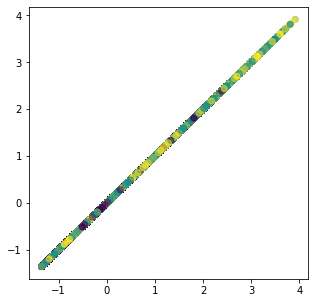

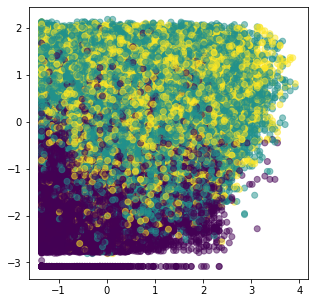

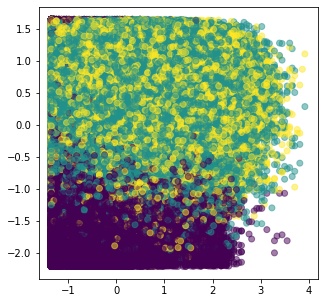

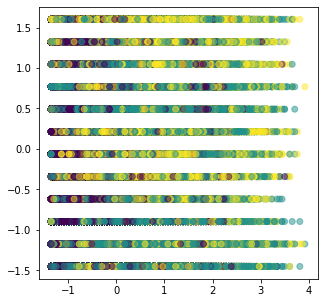

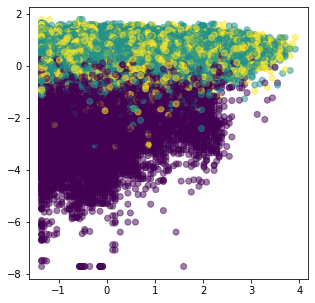

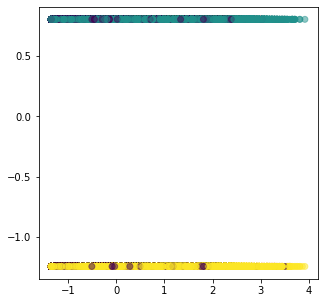

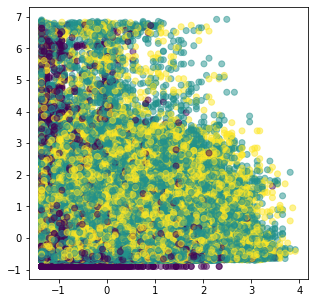

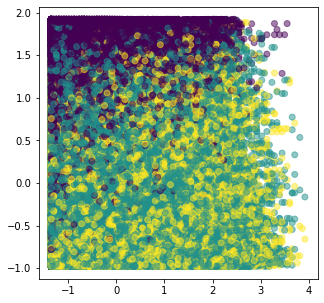

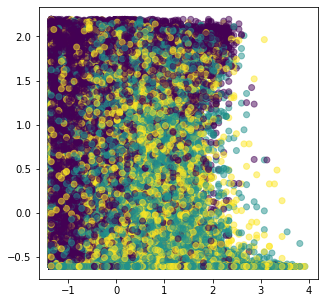

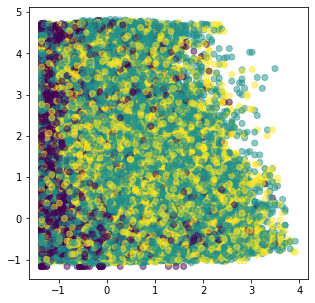

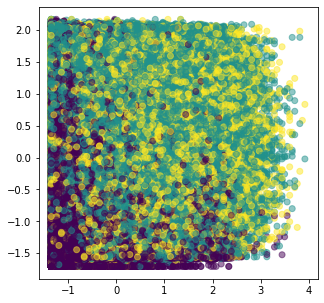

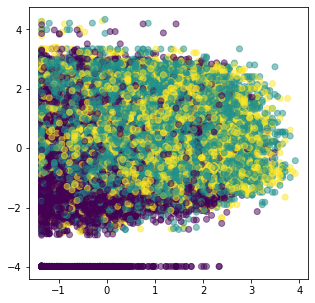

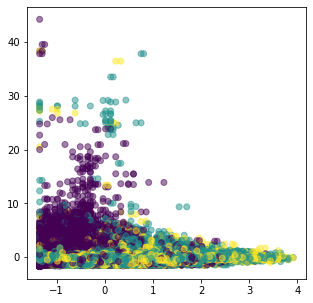

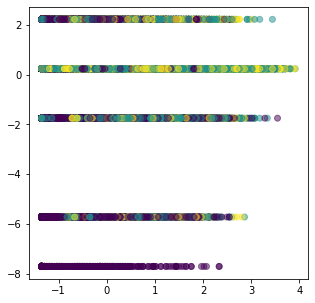

In [221]:
for i in range(len(X_prep[0])):
    plt.figure(figsize=(5, 5))
    plt.scatter(X_prep[:, 0], X_prep[:, i], c=clusters,alpha=0.5)
    plt.show()

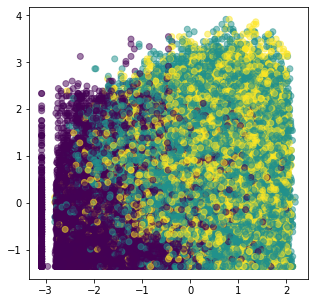

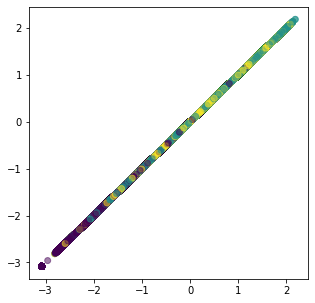

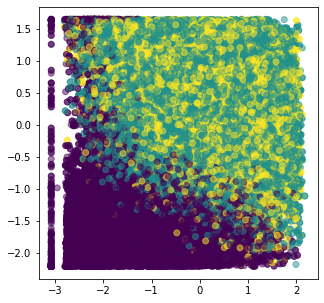

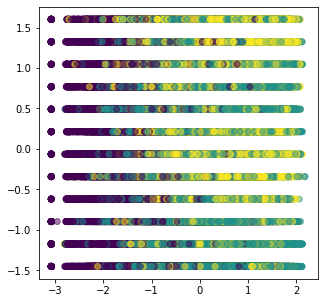

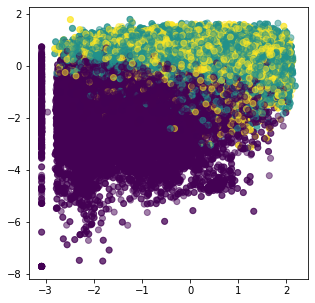

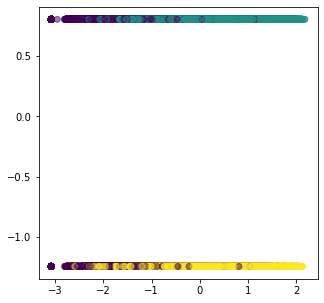

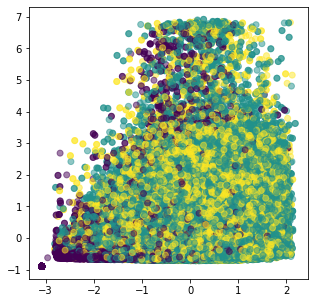

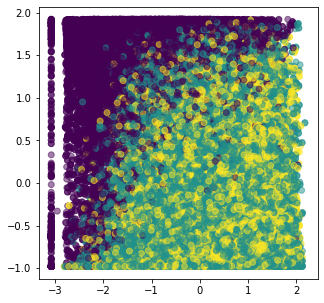

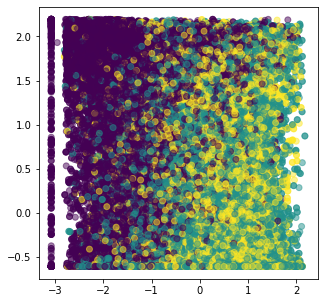

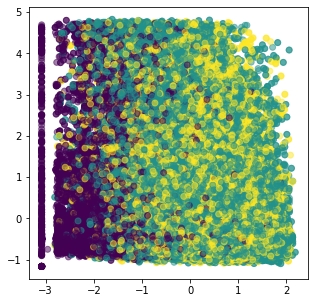

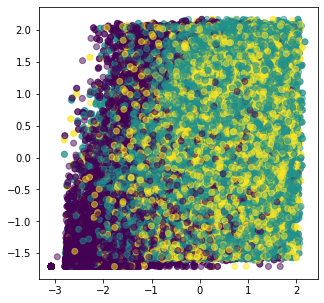

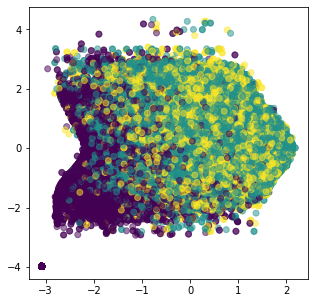

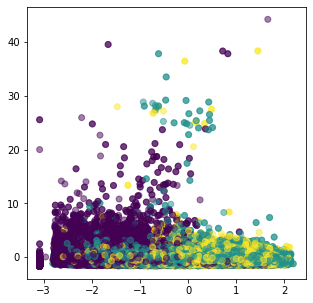

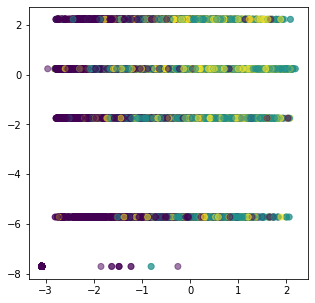

In [222]:
for i in range(len(X_prep[0])):
    plt.figure(figsize=(5, 5))
    plt.scatter(X_prep[:, 1], X_prep[:, i], c=clusters,alpha=0.5)
    plt.show()

Text(0.5, 1.0, 'Correlation of in original data')

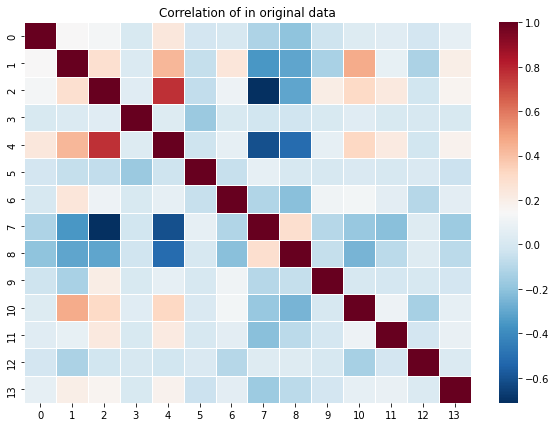

In [223]:
corr = pd.DataFrame(X_prep).corr()
plt.figure(figsize = (10,7))
sb.heatmap(corr, 
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5)
plt.title('Correlation of in original data')

In [224]:
kmeans.inertia_ 

2442187.003897065

In [225]:
%%time
kmeans = KMeans(n_clusters=3,
                init="random",
                n_init=100,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=42)
kmeans.fit(X_prep)
print(kmeans.inertia_)

2442186.0262414515
Wall time: 15.6 s


In [ ]:
%%time
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=42)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

# not very clear where the elbow is here but I would guess 5 or 6

In [ ]:
%%time
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=42)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

# although there is a clear silhouette at 3, if I take into account the elbow method,
# with a second silhouette peak at 6, I will move forward with 6 clusters

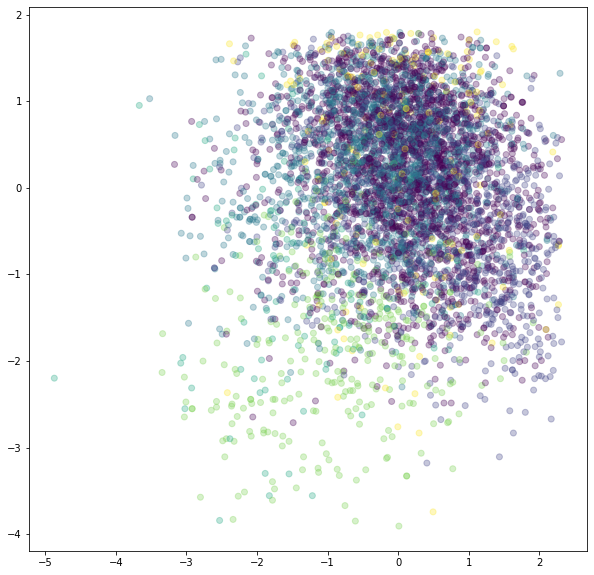

In [107]:
# ward linkage
X = X_prep
agglomerative = cluster.AgglomerativeClustering(n_clusters=6,linkage='ward')
pred = agglomerative.fit_predict(X_prep)

plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=pred,alpha=0.3)
plt.show()

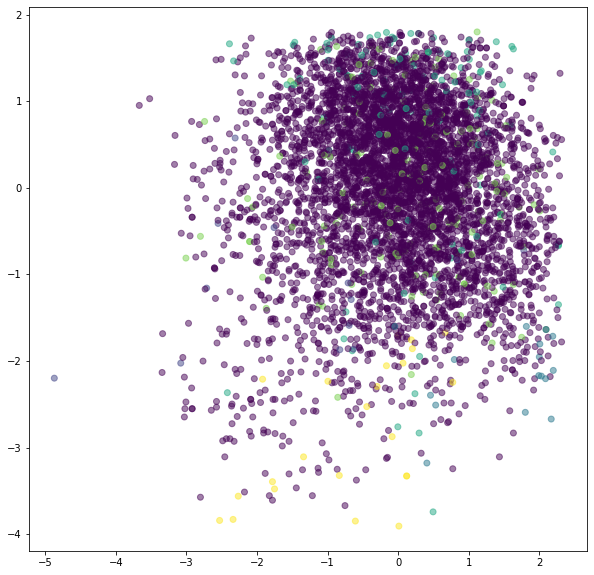

In [99]:
# complete linkage
agglomerative = cluster.AgglomerativeClustering(n_clusters=6,linkage='complete')
pred = agglomerative.fit_predict(X)

plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=pred,alpha=0.5)
#plt.scatter(X['alcohol'], X['malic_acid'], c=pred,alpha=0.5)
plt.show()

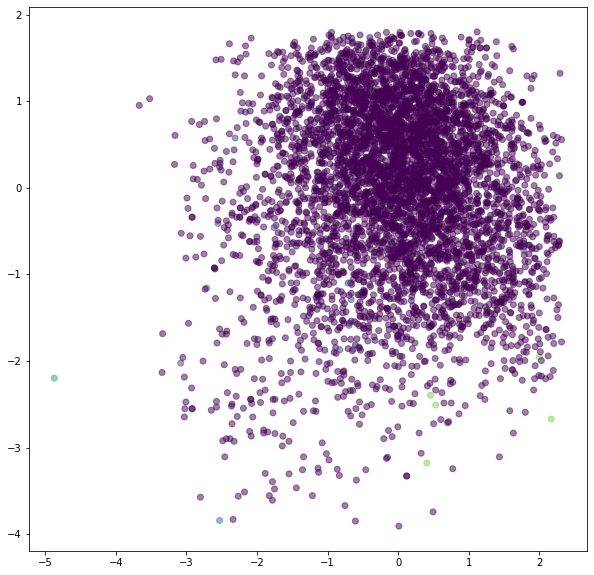

In [100]:
# average linkage
agglomerative = cluster.AgglomerativeClustering(n_clusters=6,linkage='average')
pred = agglomerative.fit_predict(X)

plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=pred,alpha=0.5)
#plt.scatter(X['alcohol'], X['malic_acid'], c=pred,alpha=0.5)
plt.show()

### ward linkage seems the most promising

In [89]:
pred[0:100]

array([2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 1, 5,
       0, 0, 1, 0, 2, 0, 2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0,
       0, 0, 1, 0, 1, 5, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2,
       2, 0, 1, 1, 5, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 5, 5, 0,
       1, 0, 1, 2, 0, 1, 1, 5, 2, 1, 0, 5], dtype=int64)